# Gene data cooking

* gene_table.txt contains summary annotation on all human genes, based on the Ensembl annotation:
* gene_name
* gene_biotype (e.g., protein_coding, pseudogene, lincRNA, miRNA etc)
* chromosome (on which the gene is located
* strand (on which the gene is located)
* transcript_count (the number of known isoforms of the gene)

In [2]:
import pandas as pd

# Reading from CSV files

* Pandas provides the read_csv() function which can be used data from a CSV file

In [3]:
# by read from file gene_table and delimit the fields using ','
df=pd.read_csv('gene_table.txt', sep=',')

# Accessing the DataFrame

## Displaying the DataFame's top rows

In [4]:
# head() method displays by default the top-5 rows of a dataframe
df.head()

,gene_name,gene_biotype,chromosome,strand,transcript_count
0,TSPAN6,protein_coding,chrX,-,5
1,TNMD,protein_coding,chrX,+,2
2,DPM1,protein_coding,chr20,-,6
3,SCYL3,protein_coding,chr1,-,5
4,C1orf112,protein_coding,chr1,+,9


In [5]:
# head() accepts also a number which configures the number of top rows of the dataframe to be displayed
print(df.head(10))

  gene_name    gene_biotype chromosome strand  transcript_count
0    TSPAN6  protein_coding       chrX      -                 5
1      TNMD  protein_coding       chrX      +                 2
2      DPM1  protein_coding      chr20      -                 6
3     SCYL3  protein_coding       chr1      -                 5
4  C1orf112  protein_coding       chr1      +                 9
5       FGR  protein_coding       chr1      -                 7
6       CFH  protein_coding       chr1      +                 6
7     FUCA2  protein_coding       chr6      -                 3
8      GCLC  protein_coding       chr6      -                13
9      NFYA  protein_coding       chr6      +                 2


## Displaying the DataFrame's last rows

In [34]:
# similarly tail() displays the last 5 rows of a dataframe
df.tail()

,gene_name,gene_biotype,chromosome,strand,transcript_count
51322,MT-RNR1,Mt_rRNA,chrMT,+,1
51323,CRYM-AS1,bidirectional_promoter_lncRNA,chr16,+,3
51324,RP11-100E13.1,bidirectional_promoter_lncRNA,chr1,-,1
51325,VTRNA2-1,vaultRNA,chr5,-,1
51326,BCYRN1,scRNA,chr2,+,1


In [35]:
# or a different amount if an argument is specified
df.tail(3)

,gene_name,gene_biotype,chromosome,strand,transcript_count
51324,RP11-100E13.1,bidirectional_promoter_lncRNA,chr1,-,1
51325,VTRNA2-1,vaultRNA,chr5,-,1
51326,BCYRN1,scRNA,chr2,+,1


## Retrieving the DataFrame's dimensions

In [7]:
print("DataFrame dimensions: ", df.shape)

# the number of rows
print("DataFrame number of rows: ", df.shape[0])

# the number of columns
print("DataFrame number of columns: ", df.shape[1])

DataFrame dimensions:  (51327, 5)
DataFrame number of rows:  51327
DataFrame number of columns:  5


## Selecting DataFrame partitions

### Selecting DataFrame rows

- single rows

In [6]:
df.head()

,gene_name,gene_biotype,chromosome,strand,transcript_count
0,TSPAN6,protein_coding,chrX,-,5
1,TNMD,protein_coding,chrX,+,2
2,DPM1,protein_coding,chr20,-,6
3,SCYL3,protein_coding,chr1,-,5
4,C1orf112,protein_coding,chr1,+,9


* locate rows: loc[] when using row label/index, iloc[] when using index

In [36]:
# retrieving DataFrame row by row index
print("Row with label 11 of DataFrame:")
print(df.loc[11])

Row with label 11 of DataFrame:
gene_name                   NIPAL3
gene_biotype        protein_coding
chromosome                    chr1
strand                           +
transcript_count                 7
Name: 11, dtype: object


In [37]:
# retrieving DataFrame row by index
#print("13th row:")
print(df.iloc[12])

gene_name                    LAS1L
gene_biotype        protein_coding
chromosome                    chrX
strand                           -
transcript_count                 5
Name: 12, dtype: object


- multiple rows by slicing

In [38]:
# using a slice in 'loc', returns the part of the DataFrame, between the rows given in the slice
print("Displaying rows between label 8 and 11")
print()
print(df.loc[8:11])

Displaying rows between label 8 and 11

   gene_name    gene_biotype chromosome strand  transcript_count
8       GCLC  protein_coding       chr6      -                13
9       NFYA  protein_coding       chr6      +                 2
10     STPG1  protein_coding       chr1      -                12
11    NIPAL3  protein_coding       chr1      +                 7


In [39]:
# using a slice in iloc, returns the part of the DataFrame, indexed by the numbers in the slice
# (same idea as in Python lists)
print("Displaying rows whose index>=8  and index<11:")
print()
print(df.iloc[8:11])

Displaying rows whose index>=8  and index<11:

   gene_name    gene_biotype chromosome strand  transcript_count
8       GCLC  protein_coding       chr6      -                13
9       NFYA  protein_coding       chr6      +                 2
10     STPG1  protein_coding       chr1      -                12


### Selecting DataFrame columns

- single column (returns a Series)

In [42]:
# retrieving gene_name as a key value
print(df['gene_name'])

0               TSPAN6
1                 TNMD
2                 DPM1
3                SCYL3
4             C1orf112
             ...      
51322          MT-RNR1
51323         CRYM-AS1
51324    RP11-100E13.1
51325         VTRNA2-1
51326           BCYRN1
Name: gene_name, Length: 51327, dtype: object


In [43]:
# get method can also be used to make sure no error is raised when the given column does not exist
print(df.get('gene-name', 'No column was found'))

No column was found


- selecting multiple columns (returns a new DataFrame)

In [15]:
# retrieving multiple columns of a DataFrame
print(df[['gene_name', 'strand','transcript_count']])

           gene_name strand  transcript_count
0             TSPAN6      -                 5
1               TNMD      +                 2
2               DPM1      -                 6
3              SCYL3      -                 5
4           C1orf112      +                 9
...              ...    ...               ...
51322        MT-RNR1      +                 1
51323       CRYM-AS1      +                 3
51324  RP11-100E13.1      -                 1
51325       VTRNA2-1      -                 1
51326         BCYRN1      +                 1

[51327 rows x 3 columns]


## Iterating through a DataFrame's rows
* The iterrows() method generates an iterator object of the DataFrame, allowing us to iterate each row in the DataFrame.
* Each iteration produces an index object and a row object (a Pandas Series object).

In [44]:
#get first 3 rows of the dataframe
tiny_df = df.iloc[0:3] # 0, 1, 2
#iterate over each row
# iterrows returns an index and a panda series
for row_label, row_data in tiny_df.iterrows():
    # row_label: label of each row
    # row_data: data of each row (a Series)
    print("Row label: ", row_label)
    print("Row data: ", row_data)
    print("---------")
    #print("Row data: ", row_data['chromosome'])
    

Row label:  0
Row data:  gene_name                   TSPAN6
gene_biotype        protein_coding
chromosome                    chrX
strand                           -
transcript_count                 5
Name: 0, dtype: object
---------
Row label:  1
Row data:  gene_name                     TNMD
gene_biotype        protein_coding
chromosome                    chrX
strand                           +
transcript_count                 2
Name: 1, dtype: object
---------
Row label:  2
Row data:  gene_name                     DPM1
gene_biotype        protein_coding
chromosome                   chr20
strand                           -
transcript_count                 6
Name: 2, dtype: object
---------


## Retrieving statistics

- by using statistical methods provided by pandas

In [18]:
# for numerical columns there may be a need to retrieve basic statistics
transcript_column=df.transcript_count # df['transcript_count']
print(transcript_column)

0        5
1        2
2        6
3        5
4        9
        ..
51322    1
51323    3
51324    1
51325    1
51326    1
Name: transcript_count, Length: 51327, dtype: int64


In [45]:
# let's retrieve the statistics for the transcript_count column
print("The maximum transcript_count observed: ", transcript_column.max())

The maximum transcript_count observed:  170


In [46]:
print("The minimum transcript_count observed: ", transcript_column.min())

The minimum transcript_count observed:  1


In [47]:
print("The average transcript_count observed: ", transcript_column.mean())

The average transcript_count observed:  3.700469538449549


In [22]:
# the median is the middle element of a sorted sequence of elements
# e.g. 1,1,3,4,103,2014,98531 -> median: 4
print("The median of all transcript counts: ", transcript_column.median())

The median of all transcript counts:  1.0


- by using the describe() method

In [23]:
# pandas also provides the describe() method for statistics in numerical columns
transcript_column.describe()

count    51327.000000
mean         3.700470
std          5.336323
min          1.000000
25%          1.000000
50%          1.000000
75%          4.000000
max        170.000000
Name: transcript_count, dtype: float64

#### Plotting a histogram on a numerical column

<AxesSubplot:ylabel='Frequency'>

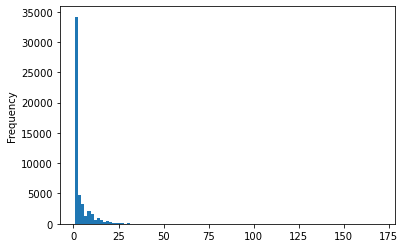

In [48]:
transcript_column.plot(kind="hist",bins=100)
# bins: refers to the number of bars that appear (configures the histogram resolution)

# Sorting DataFrame rows

Sorted by values of one (or more) columns

Sorting returns a new sorted DataFrame

## Sorting order

- ascending

In [51]:
# sorting DataFrame, by alphabetical order of gene_name
df.sort_values('transcript_count', ascending=False)
#df.sort_values('transcript_count', ascending=False).head(10)

,gene_name,gene_biotype,chromosome,strand,transcript_count
47550,PCBP1-AS1,processed_transcript,chr2,-,170
32044,LINC00969,lincRNA,chr3,+,142
30080,TEX41,lincRNA,chr2,+,103
16363,TCF4,protein_coding,chr18,-,90
11524,NDRG2,protein_coding,chr14,-,79
...,...,...,...,...,...
27712,RP11-986E7.2,processed_pseudogene,chr14,-,1
27711,RP11-305B6.1,processed_pseudogene,chr14,-,1
27710,RP11-108M12.2,processed_pseudogene,chr14,-,1
27709,RP11-545M17.2,processed_pseudogene,chr14,+,1


- descending

In [52]:
# sorting DataFrame, by the number of transcripts of each gene, in descending order
df.sort_values('transcript_count', ascending=False).head(10)

,gene_name,gene_biotype,chromosome,strand,transcript_count
47550,PCBP1-AS1,processed_transcript,chr2,-,170
32044,LINC00969,lincRNA,chr3,+,142
30080,TEX41,lincRNA,chr2,+,103
16363,TCF4,protein_coding,chr18,-,90
11524,NDRG2,protein_coding,chr14,-,79
17421,ADGRG1,protein_coding,chr16,+,77
14712,CACNB4,protein_coding,chr2,-,74
47657,SATB1-AS1,processed_transcript,chr3,+,73
37157,AC012594.1,antisense,chr2,-,73
37845,TTN-AS1,antisense,chr2,+,71


## Grouping examples

* For each biotype, find the average number of transcripts associated to genes belonging to the biotype

In [30]:
# call a head() just to remember how df looks like... 
df.head(10)

,gene_name,gene_biotype,chromosome,strand,transcript_count
0,TSPAN6,protein_coding,chrX,-,5
1,TNMD,protein_coding,chrX,+,2
2,DPM1,protein_coding,chr20,-,6
3,SCYL3,protein_coding,chr1,-,5
4,C1orf112,protein_coding,chr1,+,9
5,FGR,protein_coding,chr1,-,7
6,CFH,protein_coding,chr1,+,6
7,FUCA2,protein_coding,chr6,-,3
8,GCLC,protein_coding,chr6,-,13
9,NFYA,protein_coding,chr6,+,2


In [53]:
# Constructing the command:
#
# Dataframe: 
#           df
#
# Groub by gene_biotype: 
#           df.groupby('gene_biotype')
#

result = df.groupby('gene_biotype')['transcript_count'].mean()
print(result)

gene_biotype
3prime_overlapping_ncRNA              1.153846
IG_C_gene                             1.285714
IG_C_pseudogene                       1.000000
IG_D_gene                             1.000000
IG_J_gene                             1.000000
IG_J_pseudogene                       1.000000
IG_V_gene                             1.053846
IG_V_pseudogene                       1.000000
Mt_rRNA                               1.000000
Mt_tRNA                               1.000000
TEC                                   1.166667
TR_C_gene                             1.800000
TR_D_gene                             1.000000
TR_J_gene                             1.000000
TR_J_pseudogene                       1.000000
TR_V_gene                             1.010753
TR_V_pseudogene                       1.000000
antisense                             1.871659
bidirectional_promoter_lncRNA         2.000000
lincRNA                               1.690283
miRNA                                 1.000000


<AxesSubplot:ylabel='Frequency'>

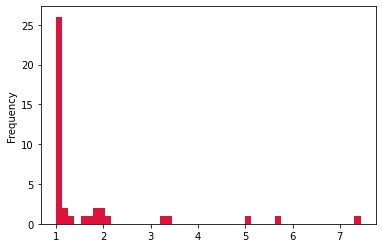

In [54]:
result.plot(kind="hist",bins=50,color="Crimson")